# Economic Indicator Basics Series: GDP 
## A closer look at U.S. Gross Domestic Product 

This is the first installment in my little series on economic indicators and there’s no better place to start than Gross Domestic Product. GDP is basically the monetary value of all goods and services produced by a country (or region) over some period of time so it’s particularly useful for comparing the size of different economies and analyzing trends in economic growth. We’re going to focus on U.S. GDP and how to analyze the most prevalent trends. 
<!-- TEASER_END -->

**What we're going to analyze:** 
* Growth in real and nominal GDP over time 
* Real GDP by major component 
* Consumer spending as a percent of total GDP 

### Why we care about GDP

GDP tells us how big an economy is and more importantly, how much it’s growing. Without economic growth, you get recessions. As a result, GDP is closely watched by policy makers at the Fed and many others to gauge the health of our economy. U.S. GDP is published with some nice additional detail that gives us insight into the composition (and therefore main drivers) of the economy like personal consumption expenditures and further detail like corporate profits and inventories. Lots of additional detail is available but we’re going to stick with the high-level stuff for now. 

**Links to more info on GDP:** 
* [The agency that produces the data is the Bureau of Economic Analysis (BEA)](https://www.bea.gov/data/gdp/gross-domestic-product) 
* [Wikipedia definition of GDP](https://en.wikipedia.org/wiki/Gross_domestic_product) 
* [Investopedia has a nice series on economic indicators and GDP is part of it](https://www.investopedia.com/university/releases/gdp.asp) 
* [Khan Academy Economic Indicators and the Business Cycle Video Series](https://www.khanacademy.org/economics-finance-domain/macroeconomics/macro-economic-indicators-and-the-business-cycle) 


**Okay, let's write some code!** 

In [1]:
# imports and preliminary settings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web  
import datetime
plt.style.use('ggplot')
%matplotlib inline 
plt.rcParams['figure.figsize'] = [7, 4]

In [2]:
# saving FRED IDs and series names in a dictionary for later use  
tgt_dict = {
    "GDP": "Gross Domestic Product", 
    "GDPC1": "Real Gross Domestic Product", 
    "PCECC96": "Real Personal Consumption Expenditures",
    "GCEC1": "Real Government Consumption and Investment",
    "GPDIC1": "Real Gross Private Domestic Investment",
    "EXPGSC1":"Real Exports of Goods and Services",
    "IMPGSC1": "Real Imports of Goods and Services", 
    "A191RL1Q225SBEA": "Real GDP Percent Change from Preceding Period (SA)"}

# save FRED IDs in a list to use in the API call 
tgt_series = [k for k, v in tgt_dict.items()] 
print(tgt_series) 

['GDP', 'GDPC1', 'PCECC96', 'GCEC1', 'GPDIC1', 'EXPGSC1', 'IMPGSC1', 'A191RL1Q225SBEA']


In [3]:
# retrieve data from the FRED with pandas-datareader 

# set start date (leaving out an end date defaults to the most recent data available) 
startdt = datetime.datetime(1947,1,1)

# API call - entering a list of series IDs still returns a single dataframe
df = web.DataReader(tgt_series, 'fred', startdt)
df.index.name = None 

df.head()

,GDP,GDPC1,PCECC96,GCEC1,GPDIC1,EXPGSC1,IMPGSC1,A191RL1Q225SBEA
1947-01-01,243.164,2033.061,1274.952,524.076,218.091,97.759,60.271,NaN
1947-04-01,245.968,2027.639,1296.163,523.632,201.386,96.526,61.432,-1.0
1947-07-01,249.585,2023.452,1300.388,523.527,195.461,91.627,54.482,-0.8
1947-10-01,259.745,2055.103,1300.801,519.285,233.284,81.245,57.419,6.4
1948-01-01,265.742,2086.017,1307.283,527.020,257.220,77.539,64.749,6.2


### GDP Growth 
Now that we have our data, let's look at GDP growth. As of the latest report available in February 2019, U.S. GDP stands at about $20 trillion. As you'll see below, showing growth over time is best done using the inflation-adjusted, "Real GDP" series, which is in 2012 dollars. Even better is the official Real GDP series reported in seasonally adjusted, annualized percent changes. Media folks tend to vary in which they use to report GDP, but the ones that know what they're doing use Real GDP. 

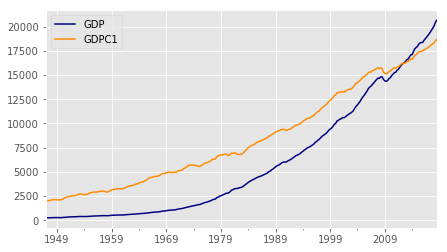

In [4]:
# Nominal vs Real GDP 
# not super helpful unless you want to show the huge growth seen in the U.S. over time 
# Nominal GDP is the "GDP" series and Real GDP is the "GDPC1" series 
df.plot(x=df.index, y=['GDP', 'GDPC1'], color=['navy', 'darkorange'])

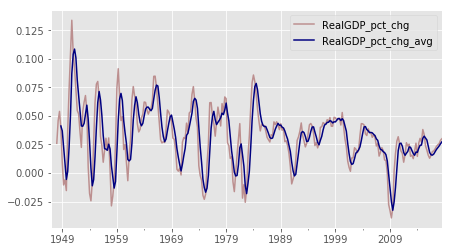

In [5]:
# Growth over time from simple percent change in Real GDP 

# percent change in Real GDP from preceeding period (one year ago) 
df['RealGDP_pct_chg'] = df['GDPC1'].pct_change(4)
#  Rolling 4 quarter average percent change
df['RealGDP_pct_chg_avg'] = df['RealGDP_pct_chg'].rolling(4).mean()

# chart of both series 
df.plot(x=df.index, y=['RealGDP_pct_chg', 'RealGDP_pct_chg_avg'], 
        color=['rosybrown', 'navy'])

This looks pretty good but the official growth numbers are usually annualized and seasonally adjusted, so while the trend is the same, our numbers might be a little off. Luckily, the official series is also available from the FRED (and is already in our dataframe) so let's see how that looks. 

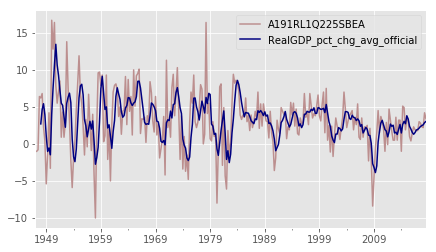

In [6]:
# Growth over time from official, seasonally adjusted, annualized series 

#  Rolling 4 quarter average percent change
df['RealGDP_pct_chg_avg_official'] = df['A191RL1Q225SBEA'].rolling(4).mean()

df.plot(x=df.index, y=['A191RL1Q225SBEA', 'RealGDP_pct_chg_avg_official'], 
         color=['rosybrown', 'navy'])

### GDP Growth Recap 

We see the trend is the same but the magnitude varies due to the seasonal adjustments and the annualized rate calculations. If you're going for precision or trying to replicate an official number, it's always best to go with the official series. If you're doing a quick trend analysis or want  more control over the seasonal adjustment and annualization caluculations, you'll want the series reported in levels (not changes). 

### Major Components of GDP 
Have you ever heard someone say "the U.S. is a consumer-driven economy" and wondered what that meant? Well you're in luck because we're going to look into that now! 

**GDP has 4 major components:** 
1. Personal consumption expenditures (consumer spending) 
2. Government consumption and investment (government spending) 
3. Private domestic investment 
4. Net exports (total exports minus total imports) 

**Of the 4 major components, consumer spending is the biggest single component of U.S. GDP,** which means the U.S. really is a "consumer-driven" economy that relies heavily on consumers buying stuff for growth and overall economic health. Let's chart out the components and highlight the percentage of total GDP accounted for by consumer spending to show this relationship. 

In [7]:
# first we need consumption as a percent of total, Real GDP 
df['Consumption_pct_total'] = df['PCECC96'] / df['GDPC1']

# note that 'net exports' (exports minus imports) is what gets added into the GDP total 
# we're showing both total imports and exports in the chart to highlight their trends
# we're converting total imports to negative values because they're subtracted from GDP 
df['IMPGSC1_n'] = df['IMPGSC1'] * -1 

df.head()

,GDP,GDPC1,PCECC96,GCEC1,GPDIC1,EXPGSC1,IMPGSC1,A191RL1Q225SBEA,RealGDP_pct_chg,RealGDP_pct_chg_avg,RealGDP_pct_chg_avg_official,Consumption_pct_total,IMPGSC1_n
1947-01-01,243.164,2033.061,1274.952,524.076,218.091,97.759,60.271,NaN,NaN,NaN,NaN,0.627110,-60.271
1947-04-01,245.968,2027.639,1296.163,523.632,201.386,96.526,61.432,-1.0,NaN,NaN,NaN,0.639247,-61.432
1947-07-01,249.585,2023.452,1300.388,523.527,195.461,91.627,54.482,-0.8,NaN,NaN,NaN,0.642658,-54.482
1947-10-01,259.745,2055.103,1300.801,519.285,233.284,81.245,57.419,6.4,NaN,NaN,NaN,0.632961,-57.419
1948-01-01,265.742,2086.017,1307.283,527.020,257.220,77.539,64.749,6.2,0.026047,NaN,2.7,0.626689,-64.749


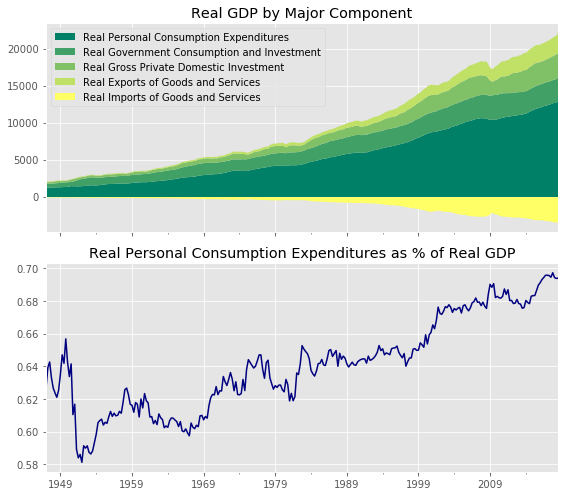

In [8]:
# Here we're going to make a 2 figure chart 
# Top chart: stacked area of GDP components; Bottom chart: consumption as % of total

# clean lists of ids and labels for the chart 
stack_ids = ['PCECC96', 'GCEC1', 'GPDIC1', 'EXPGSC1', 'IMPGSC1_n']
stack_labels = ["Real Personal Consumption Expenditures",
                "Real Government Consumption and Investment",
                "Real Gross Private Domestic Investment", 
                "Real Exports of Goods and Services",
                "Real Imports of Goods and Services"]

# chart code 
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,7), sharex=True)
# stacked area chart (note the imports series as the negative values at the bottom) 
df.plot(x=df.index, y=stack_ids, kind='area', stacked=True, linewidth=0, 
        colormap='summer', ax=ax1, title='Real GDP by Major Component')
# series name labels in chart legend 
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, stack_labels)
# line chart 
df.plot(x=df.index, y='Consumption_pct_total', color='navy', legend=False, ax=ax2, 
        title='Real Personal Consumption Expenditures as % of Real GDP')
plt.tight_layout()
plt.show()

### Consumer Spending Recap 
We clearly see from the charts that personal consumption expenditures (consumer spending) is by far the largest component of GDP. Not only has it been this way for decades but the share accounted for by consumer spending has been increasing as well. At the moment (February 2019) it's just under 70% of the total!

### GDP Summary 
I hope you found this post a helpful guide to some of the more common ways to look at GDP. All economies need consistent, sustainable growth to stay healthy. In the U.S. consumer spending is the biggest single component of GDP, which is why it gets so much attention from policy makers, financial markets, and the media. 

In the next few posts we'll look at inflation, employment, and unemployment. 